In [1]:
import os
from tempfile import tempdir
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import tqdm
import importlib

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt
from copy import copy 

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters
from corems.encapsulation.constant import Atoms
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

import corems.lc_icpms_ftms.calc.lc_icrms_qc_assign as icrms
import corems.lc_icpms_ftms.calc.lc_icrms_helpers as lcmsfns

import importlib
importlib.reload(icrms)


#rawfile='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/backup/20221102_LBA_Boiteau_Zorbax3p5_slough_400_500_02.raw'



<module 'corems.lc_icpms_ftms.calc.lc_icrms_qc_assign' from '/Users/christiandewey/CoreMS/corems/lc_icpms_ftms/calc/lc_icrms_qc_assign.py'>

In [3]:
# reload modules & set fname
importlib.reload(icrms)
importlib.reload(lcmsfns)

fname = 'slough-CHON3CuFe_23-01-06.csv'

In [45]:
# get files & parsers

dir='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/lowmz-r1/'
flist=os.listdir(dir)
os.chdir(dir)

# get parsers

MSfiles={}

for f in flist:
    if ('.raw' in f) & ('_rep2' not in f):
        print(f)
        parser = rawFileReader.ImportMassSpectraThermoMSFileReader(f)
        MSfiles[f]={'parser': parser}

data = icrms.lc_icr_assign(dir)

data.master_data_holder = MSfiles

data._raw_filelist = data.master_data_holder.keys()

20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw


In [46]:
# set assignment parameters
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.25
MSParameters.molecular_search.max_ppm_error = 0.25

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"

MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,3)
MSParameters.molecular_search.usedAtoms['Cu'] = (0,1)
MSParameters.molecular_search.usedAtoms['Fe'] = (0,1)
#MSParameters.molecular_search.usedAtoms['S'] = (0,1)
#MSParameters.molecular_search.usedAtoms['P'] = (0,1)




In [47]:
# run assignment algorithm
timerange = [4,22]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref"

data.assign_formula(interval = interval, timerange = timerange, refmasslist = refmasslist, calorder =2)

data_df = data.complete_results_df



20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
1 of 7 files
timestart: 4
MS Obj loaded - 1268 peaks found.
MS Obj loaded - 1268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
34 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.027 ppm
minimize function performed 174 fn evals and 2 iterations
'runworker'  22.94 ms


Loading molecular formula database: 246538it [00:08, 29170.43it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 146.86it/s]
Loading molecular formula database: 16580it [00:00, 39177.39it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 344.48it/s]


'run_molecular_formula'  11136.49 ms
466 assigned peaks and 802 unassigned peaks, total  = 36.75 %, relative abundance = 34.46 %, RMS error (best candidate) (ppm) = 0.051
timestart: 6
MS Obj loaded - 2128 peaks found.
MS Obj loaded - 2128 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
62 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 326 fn evals and 4 iterations
'runworker'  14.57 ms


Loading molecular formula database: 246538it [00:08, 30131.30it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 89.91it/s] 
Loading molecular formula database: 16580it [00:00, 41607.27it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 226.53it/s]


'run_molecular_formula'  12116.35 ms
1115 assigned peaks and 1013 unassigned peaks, total  = 52.40 %, relative abundance = 55.14 %, RMS error (best candidate) (ppm) = 0.047
timestart: 8
MS Obj loaded - 2816 peaks found.
MS Obj loaded - 2816 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
87 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 273 fn evals and 3 iterations
'runworker'  14.22 ms


Loading molecular formula database: 246538it [00:08, 30183.11it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 68.54it/s]
Loading molecular formula database: 16580it [00:00, 41010.56it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 169.78it/s]


'run_molecular_formula'  13177.30 ms
1581 assigned peaks and 1235 unassigned peaks, total  = 56.14 %, relative abundance = 63.70 %, RMS error (best candidate) (ppm) = 0.052
timestart: 10
MS Obj loaded - 3077 peaks found.
MS Obj loaded - 3077 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  14.35 ms


Loading molecular formula database: 246538it [00:08, 30391.09it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 61.79it/s]
Loading molecular formula database: 16580it [00:00, 41876.44it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 153.72it/s]


'run_molecular_formula'  13608.49 ms
1847 assigned peaks and 1230 unassigned peaks, total  = 60.03 %, relative abundance = 67.38 %, RMS error (best candidate) (ppm) = 0.054
timestart: 12
MS Obj loaded - 3549 peaks found.
MS Obj loaded - 3549 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
143 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  15.19 ms


Loading molecular formula database: 246538it [00:07, 31286.27it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 54.35it/s]
Loading molecular formula database: 16580it [00:00, 41327.07it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 134.17it/s]


'run_molecular_formula'  14060.77 ms
2185 assigned peaks and 1364 unassigned peaks, total  = 61.57 %, relative abundance = 71.26 %, RMS error (best candidate) (ppm) = 0.048
timestart: 14
MS Obj loaded - 3768 peaks found.
MS Obj loaded - 3768 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
153 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 363 fn evals and 7 iterations
'runworker'  14.55 ms


Loading molecular formula database: 246538it [00:07, 30951.33it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 51.01it/s]
Loading molecular formula database: 16580it [00:00, 41519.11it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 127.32it/s]


'run_molecular_formula'  14512.87 ms
2401 assigned peaks and 1367 unassigned peaks, total  = 63.72 %, relative abundance = 76.18 %, RMS error (best candidate) (ppm) = 0.053
timestart: 16
MS Obj loaded - 3452 peaks found.
MS Obj loaded - 3452 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
162 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 360 fn evals and 7 iterations
'runworker'  14.47 ms


Loading molecular formula database: 246538it [00:08, 29204.32it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 55.80it/s]
Loading molecular formula database: 16580it [00:00, 41233.42it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 138.77it/s]


'run_molecular_formula'  14473.81 ms
2295 assigned peaks and 1157 unassigned peaks, total  = 66.48 %, relative abundance = 78.76 %, RMS error (best candidate) (ppm) = 0.050
timestart: 18
MS Obj loaded - 3759 peaks found.
MS Obj loaded - 3759 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
166 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  14.44 ms


Loading molecular formula database: 246538it [00:07, 31969.59it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 50.69it/s]
Loading molecular formula database: 16580it [00:00, 41323.98it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 126.73it/s]


'run_molecular_formula'  14297.34 ms
2515 assigned peaks and 1244 unassigned peaks, total  = 66.91 %, relative abundance = 81.02 %, RMS error (best candidate) (ppm) = 0.051
timestart: 20
MS Obj loaded - 3919 peaks found.
MS Obj loaded - 3919 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
167 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  14.44 ms


Loading molecular formula database: 246538it [00:07, 30886.20it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 49.02it/s]
Loading molecular formula database: 16580it [00:00, 41047.54it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 119.61it/s]


'run_molecular_formula'  14781.96 ms
2655 assigned peaks and 1264 unassigned peaks, total  = 67.75 %, relative abundance = 82.81 %, RMS error (best candidate) (ppm) = 0.054


20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
2 of 7 files
timestart: 4
MS Obj loaded - 1634 peaks found.
MS Obj loaded - 1634 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
77 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.024 ppm
minimize function performed 350 fn evals and 7 iterations
'runworker'  14.75 ms


Loading molecular formula database: 246538it [00:09, 26947.78it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 118.94it/s]
Loading molecular formula database: 16580it [00:00, 36045.98it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 186.82it/s]


'run_molecular_formula'  12387.24 ms
717 assigned peaks and 917 unassigned peaks, total  = 43.88 %, relative abundance = 40.66 %, RMS error (best candidate) (ppm) = 0.039
timestart: 6
MS Obj loaded - 2758 peaks found.
MS Obj loaded - 2758 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 352 fn evals and 4 iterations
'runworker'  14.36 ms


Loading molecular formula database: 246538it [00:10, 24489.61it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 72.78it/s]
Loading molecular formula database: 16580it [00:00, 18346.83it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 113.29it/s]


'run_molecular_formula'  15394.77 ms
1553 assigned peaks and 1205 unassigned peaks, total  = 56.31 %, relative abundance = 59.91 %, RMS error (best candidate) (ppm) = 0.034
timestart: 8
MS Obj loaded - 3769 peaks found.
MS Obj loaded - 3769 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
156 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  14.32 ms


Loading molecular formula database: 246538it [00:11, 21921.15it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 52.70it/s]
Loading molecular formula database: 16580it [00:00, 29101.66it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 79.93it/s]


'run_molecular_formula'  17979.11 ms
2135 assigned peaks and 1634 unassigned peaks, total  = 56.65 %, relative abundance = 63.67 %, RMS error (best candidate) (ppm) = 0.042
timestart: 10
MS Obj loaded - 4003 peaks found.
MS Obj loaded - 4003 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
195 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 321 fn evals and 6 iterations
'runworker'  14.56 ms


Loading molecular formula database: 246538it [00:11, 22211.01it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 49.57it/s]
Loading molecular formula database: 16580it [00:00, 28841.14it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 78.28it/s]


'run_molecular_formula'  18205.10 ms
2455 assigned peaks and 1548 unassigned peaks, total  = 61.33 %, relative abundance = 70.82 %, RMS error (best candidate) (ppm) = 0.043
timestart: 12
MS Obj loaded - 4329 peaks found.
MS Obj loaded - 4329 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
226 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  14.42 ms


Loading molecular formula database: 246538it [00:11, 21461.68it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 44.51it/s]
Loading molecular formula database: 16580it [00:00, 27123.93it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 69.23it/s]


'run_molecular_formula'  19363.03 ms
2722 assigned peaks and 1607 unassigned peaks, total  = 62.88 %, relative abundance = 74.27 %, RMS error (best candidate) (ppm) = 0.045
timestart: 14
MS Obj loaded - 4619 peaks found.
MS Obj loaded - 4619 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
246 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  14.43 ms


Loading molecular formula database: 246538it [00:11, 21400.10it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 42.14it/s]
Loading molecular formula database: 16580it [00:01, 14574.42it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 64.30it/s]


'run_molecular_formula'  20258.41 ms
3000 assigned peaks and 1619 unassigned peaks, total  = 64.95 %, relative abundance = 78.31 %, RMS error (best candidate) (ppm) = 0.046
timestart: 16
MS Obj loaded - 4899 peaks found.
MS Obj loaded - 4899 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
257 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 3020 fn evals and 69 iterations
'runworker'  14.62 ms


Loading molecular formula database: 246538it [00:11, 21161.59it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 38.54it/s]
Loading molecular formula database: 16580it [00:00, 25709.22it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 57.60it/s]


'run_molecular_formula'  20687.88 ms
3151 assigned peaks and 1748 unassigned peaks, total  = 64.32 %, relative abundance = 80.20 %, RMS error (best candidate) (ppm) = 0.051
timestart: 18
MS Obj loaded - 5289 peaks found.
MS Obj loaded - 5289 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
268 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 470 fn evals and 10 iterations
'runworker'  14.71 ms


Loading molecular formula database: 246538it [00:11, 20647.95it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:08<00:00, 35.14it/s]
Loading molecular formula database: 16580it [00:00, 25225.29it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 53.85it/s]


'run_molecular_formula'  21774.85 ms
3455 assigned peaks and 1834 unassigned peaks, total  = 65.32 %, relative abundance = 81.58 %, RMS error (best candidate) (ppm) = 0.067
timestart: 20
MS Obj loaded - 5527 peaks found.
MS Obj loaded - 5527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
262 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 3029 fn evals and 71 iterations
'runworker'  14.52 ms


Loading molecular formula database: 246538it [00:12, 20236.77it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:08<00:00, 33.85it/s]
Loading molecular formula database: 16580it [00:00, 24742.54it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 50.51it/s]


'run_molecular_formula'  22378.37 ms
3688 assigned peaks and 1839 unassigned peaks, total  = 66.73 %, relative abundance = 82.13 %, RMS error (best candidate) (ppm) = 0.058


20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
3 of 7 files
timestart: 4
MS Obj loaded - 1155 peaks found.
MS Obj loaded - 1155 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
32 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 265 fn evals and 3 iterations
'runworker'  14.76 ms


Loading molecular formula database: 246538it [00:06, 37452.13it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 179.02it/s]
Loading molecular formula database: 16580it [00:00, 46912.32it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1393.16it/s]


'run_molecular_formula'  8691.85 ms
487 assigned peaks and 668 unassigned peaks, total  = 42.16 %, relative abundance = 41.23 %, RMS error (best candidate) (ppm) = 0.045
timestart: 6
MS Obj loaded - 1591 peaks found.
MS Obj loaded - 1591 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
52 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 260 fn evals and 3 iterations
'runworker'  14.85 ms


Loading molecular formula database: 246538it [00:07, 34110.24it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 129.38it/s]
Loading molecular formula database: 16580it [00:00, 49032.67it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1158.63it/s]


'run_molecular_formula'  9967.72 ms
857 assigned peaks and 734 unassigned peaks, total  = 53.87 %, relative abundance = 58.07 %, RMS error (best candidate) (ppm) = 0.042
timestart: 8
MS Obj loaded - 1981 peaks found.
MS Obj loaded - 1981 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
75 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 257 fn evals and 3 iterations
'runworker'  14.44 ms


Loading molecular formula database: 246538it [00:06, 36188.12it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 107.24it/s]
Loading molecular formula database: 16580it [00:00, 48206.92it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1040.14it/s]


'run_molecular_formula'  10042.12 ms
1108 assigned peaks and 873 unassigned peaks, total  = 55.93 %, relative abundance = 64.98 %, RMS error (best candidate) (ppm) = 0.043
timestart: 10
MS Obj loaded - 2115 peaks found.
MS Obj loaded - 2115 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
86 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  14.80 ms


Loading molecular formula database: 246538it [00:06, 35999.47it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 98.93it/s] 
Loading molecular formula database: 16580it [00:00, 47125.03it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 989.60it/s]


'run_molecular_formula'  10323.08 ms
1261 assigned peaks and 854 unassigned peaks, total  = 59.62 %, relative abundance = 67.96 %, RMS error (best candidate) (ppm) = 0.044
timestart: 12
MS Obj loaded - 2461 peaks found.
MS Obj loaded - 2461 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
101 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 367 fn evals and 7 iterations
'runworker'  14.12 ms


Loading molecular formula database: 246538it [00:06, 36345.48it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 86.00it/s]
Loading molecular formula database: 16580it [00:00, 31590.59it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 910.08it/s]


'run_molecular_formula'  10869.41 ms
1444 assigned peaks and 1017 unassigned peaks, total  = 58.68 %, relative abundance = 72.51 %, RMS error (best candidate) (ppm) = 0.044
timestart: 14
MS Obj loaded - 2508 peaks found.
MS Obj loaded - 2508 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  14.61 ms


Loading molecular formula database: 246538it [00:06, 35919.43it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 84.32it/s]
Loading molecular formula database: 16580it [00:00, 30908.90it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 849.91it/s]


'run_molecular_formula'  11035.41 ms
1544 assigned peaks and 964 unassigned peaks, total  = 61.56 %, relative abundance = 76.93 %, RMS error (best candidate) (ppm) = 0.044
timestart: 16
MS Obj loaded - 2527 peaks found.
MS Obj loaded - 2527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 371 fn evals and 7 iterations
'runworker'  14.07 ms


Loading molecular formula database: 246538it [00:06, 36932.41it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 85.72it/s]
Loading molecular formula database: 16580it [00:00, 31876.39it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 896.57it/s]


'run_molecular_formula'  10768.40 ms
1591 assigned peaks and 936 unassigned peaks, total  = 62.96 %, relative abundance = 79.18 %, RMS error (best candidate) (ppm) = 0.049
timestart: 18
MS Obj loaded - 2598 peaks found.
MS Obj loaded - 2598 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
118 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  14.82 ms


Loading molecular formula database: 246538it [00:07, 33677.67it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 82.79it/s]
Loading molecular formula database: 16580it [00:00, 47244.83it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 757.06it/s]


'run_molecular_formula'  11391.50 ms
1675 assigned peaks and 923 unassigned peaks, total  = 64.47 %, relative abundance = 81.90 %, RMS error (best candidate) (ppm) = 0.047
timestart: 20
MS Obj loaded - 2489 peaks found.
MS Obj loaded - 2489 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  14.70 ms


Loading molecular formula database: 246538it [00:06, 37203.80it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 83.85it/s]
Loading molecular formula database: 16580it [00:00, 31792.00it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 892.90it/s]


'run_molecular_formula'  10800.29 ms
1667 assigned peaks and 822 unassigned peaks, total  = 66.97 %, relative abundance = 83.82 %, RMS error (best candidate) (ppm) = 0.048


20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
4 of 7 files
timestart: 4
MS Obj loaded - 622 peaks found.
MS Obj loaded - 622 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.035 ppm
minimize function performed 259 fn evals and 3 iterations
'runworker'  14.79 ms


Loading molecular formula database: 246538it [00:07, 34861.58it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 262.91it/s]
Loading molecular formula database: 16580it [00:00, 41656.00it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 533.62it/s]


'run_molecular_formula'  8726.16 ms
227 assigned peaks and 395 unassigned peaks, total  = 36.50 %, relative abundance = 30.52 %, RMS error (best candidate) (ppm) = 0.093
timestart: 6
MS Obj loaded - 876 peaks found.
MS Obj loaded - 876 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
12 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 271 fn evals and 3 iterations
'runworker'  14.18 ms


Loading molecular formula database: 246538it [00:06, 35328.93it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 179.75it/s]
Loading molecular formula database: 16580it [00:00, 29034.00it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 413.98it/s]


'run_molecular_formula'  9326.41 ms
462 assigned peaks and 414 unassigned peaks, total  = 52.74 %, relative abundance = 54.25 %, RMS error (best candidate) (ppm) = 0.056
timestart: 8
MS Obj loaded - 1139 peaks found.
MS Obj loaded - 1139 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
22 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.030 ppm
minimize function performed 263 fn evals and 3 iterations
'runworker'  14.53 ms


Loading molecular formula database: 246538it [00:07, 32923.69it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 145.72it/s]
Loading molecular formula database: 16580it [00:00, 45116.52it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 313.92it/s]


'run_molecular_formula'  10058.10 ms
661 assigned peaks and 478 unassigned peaks, total  = 58.03 %, relative abundance = 62.36 %, RMS error (best candidate) (ppm) = 0.064
timestart: 10
MS Obj loaded - 1323 peaks found.
MS Obj loaded - 1323 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
36 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 842 fn evals and 12 iterations
'runworker'  14.87 ms


Loading molecular formula database: 246538it [00:06, 36270.16it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 130.20it/s]
Loading molecular formula database: 16580it [00:00, 28590.49it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 297.68it/s]


'run_molecular_formula'  9809.85 ms
832 assigned peaks and 491 unassigned peaks, total  = 62.89 %, relative abundance = 67.86 %, RMS error (best candidate) (ppm) = 0.061
timestart: 12
MS Obj loaded - 1572 peaks found.
MS Obj loaded - 1572 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
43 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 680 fn evals and 10 iterations
'runworker'  14.71 ms


Loading molecular formula database: 246538it [00:07, 33118.19it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 111.27it/s]
Loading molecular formula database: 16580it [00:00, 46342.38it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 251.81it/s]


'run_molecular_formula'  10655.89 ms
1015 assigned peaks and 557 unassigned peaks, total  = 64.57 %, relative abundance = 68.39 %, RMS error (best candidate) (ppm) = 0.062
timestart: 14
MS Obj loaded - 1751 peaks found.
MS Obj loaded - 1751 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
47 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 727 fn evals and 10 iterations
'runworker'  14.34 ms


Loading molecular formula database: 246538it [00:06, 36374.95it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 100.46it/s]
Loading molecular formula database: 16580it [00:00, 45806.17it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 218.13it/s]


'run_molecular_formula'  10299.08 ms
1155 assigned peaks and 596 unassigned peaks, total  = 65.96 %, relative abundance = 74.50 %, RMS error (best candidate) (ppm) = 0.061
timestart: 16
MS Obj loaded - 1781 peaks found.
MS Obj loaded - 1781 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
51 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 379 fn evals and 7 iterations
'runworker'  14.37 ms


Loading molecular formula database: 246538it [00:06, 35939.70it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 98.76it/s] 
Loading molecular formula database: 16580it [00:00, 29686.23it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 222.92it/s]


'run_molecular_formula'  10605.21 ms
1213 assigned peaks and 568 unassigned peaks, total  = 68.11 %, relative abundance = 77.01 %, RMS error (best candidate) (ppm) = 0.065
timestart: 18
MS Obj loaded - 1779 peaks found.
MS Obj loaded - 1779 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
50 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  14.46 ms


Loading molecular formula database: 246538it [00:07, 34799.93it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 98.91it/s] 
Loading molecular formula database: 16580it [00:00, 46192.99it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 222.44it/s]


'run_molecular_formula'  10644.83 ms
1234 assigned peaks and 545 unassigned peaks, total  = 69.36 %, relative abundance = 78.43 %, RMS error (best candidate) (ppm) = 0.066
timestart: 20
MS Obj loaded - 1815 peaks found.
MS Obj loaded - 1815 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
50 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  15.08 ms


Loading molecular formula database: 246538it [00:06, 35607.93it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 97.41it/s] 
Loading molecular formula database: 16580it [00:00, 45984.64it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 216.90it/s]


'run_molecular_formula'  10535.53 ms
1266 assigned peaks and 549 unassigned peaks, total  = 69.75 %, relative abundance = 79.77 %, RMS error (best candidate) (ppm) = 0.062


20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
5 of 7 files
timestart: 4
MS Obj loaded - 163 peaks found.
MS Obj loaded - 163 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.16 ms


Loading molecular formula database: 246538it [00:06, 39419.70it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 822.76it/s]
Loading molecular formula database: 16580it [00:00, 30478.56it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 2477.37it/s]


'run_molecular_formula'  7215.63 ms
15 assigned peaks and 148 unassigned peaks, total  = 9.20 %, relative abundance = 10.28 %, RMS error (best candidate) (ppm) = 0.124
timestart: 6
MS Obj loaded - 149 peaks found.
MS Obj loaded - 149 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.40 ms


Loading molecular formula database: 246538it [00:06, 38306.86it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 909.28it/s]
Loading molecular formula database: 16580it [00:00, 43362.74it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 2587.64it/s]


'run_molecular_formula'  7208.53 ms
10 assigned peaks and 139 unassigned peaks, total  = 6.71 %, relative abundance = 9.69 %, RMS error (best candidate) (ppm) = 0.123
timestart: 8
MS Obj loaded - 190 peaks found.
MS Obj loaded - 190 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.68 ms


Loading molecular formula database: 246538it [00:06, 38141.31it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 768.04it/s]
Loading molecular formula database: 16580it [00:00, 30165.29it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 2527.83it/s]


'run_molecular_formula'  7457.55 ms
18 assigned peaks and 172 unassigned peaks, total  = 9.47 %, relative abundance = 11.10 %, RMS error (best candidate) (ppm) = 0.147
timestart: 10
MS Obj loaded - 222 peaks found.
MS Obj loaded - 222 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.80 ms


Loading molecular formula database: 246538it [00:06, 37799.64it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 646.90it/s]
Loading molecular formula database: 16580it [00:00, 39980.32it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 2361.26it/s]


'run_molecular_formula'  7470.30 ms
14 assigned peaks and 208 unassigned peaks, total  = 6.31 %, relative abundance = 9.56 %, RMS error (best candidate) (ppm) = 0.113
timestart: 12
MS Obj loaded - 268 peaks found.
MS Obj loaded - 268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.34 ms


Loading molecular formula database: 246538it [00:06, 36598.67it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 599.92it/s]
Loading molecular formula database: 16580it [00:00, 41325.92it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 2237.62it/s]


'run_molecular_formula'  7707.32 ms
12 assigned peaks and 256 unassigned peaks, total  = 4.48 %, relative abundance = 8.96 %, RMS error (best candidate) (ppm) = 0.168
timestart: 14
MS Obj loaded - 400 peaks found.
MS Obj loaded - 400 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.95 ms


Loading molecular formula database: 246538it [00:06, 36410.64it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 444.96it/s]
Loading molecular formula database: 16580it [00:00, 28967.42it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1923.99it/s]


'run_molecular_formula'  8079.36 ms
16 assigned peaks and 384 unassigned peaks, total  = 4.00 %, relative abundance = 2.80 %, RMS error (best candidate) (ppm) = 0.144
timestart: 16
MS Obj loaded - 430 peaks found.
MS Obj loaded - 430 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 1206 fn evals and 16 iterations
'runworker'  15.42 ms


Loading molecular formula database: 246538it [00:06, 35992.34it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 393.06it/s]
Loading molecular formula database: 16580it [00:00, 45528.30it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1959.45it/s]


'run_molecular_formula'  8051.74 ms
183 assigned peaks and 247 unassigned peaks, total  = 42.56 %, relative abundance = 29.60 %, RMS error (best candidate) (ppm) = 0.106
timestart: 18
MS Obj loaded - 506 peaks found.
MS Obj loaded - 506 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 589 fn evals and 8 iterations
'runworker'  14.94 ms


Loading molecular formula database: 246538it [00:06, 35680.57it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 342.84it/s]
Loading molecular formula database: 16580it [00:00, 44794.00it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1729.82it/s]


'run_molecular_formula'  8231.00 ms
224 assigned peaks and 282 unassigned peaks, total  = 44.27 %, relative abundance = 30.41 %, RMS error (best candidate) (ppm) = 0.107
timestart: 20
MS Obj loaded - 445 peaks found.
MS Obj loaded - 445 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
8 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 577 fn evals and 8 iterations
'runworker'  15.11 ms


Loading molecular formula database: 246538it [00:06, 36596.65it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 379.94it/s]
Loading molecular formula database: 16580it [00:00, 45301.68it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1859.92it/s]


'run_molecular_formula'  7968.05 ms
230 assigned peaks and 215 unassigned peaks, total  = 51.69 %, relative abundance = 36.97 %, RMS error (best candidate) (ppm) = 0.090


20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
6 of 7 files
timestart: 4
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.11 ms


Loading molecular formula database: 246538it [00:06, 39461.60it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 936.40it/s]
Loading molecular formula database: 16580it [00:00, 28874.66it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1443.23it/s]


'run_molecular_formula'  7205.53 ms
19 assigned peaks and 75 unassigned peaks, total  = 20.21 %, relative abundance = 8.86 %, RMS error (best candidate) (ppm) = 0.122
timestart: 6
MS Obj loaded - 83 peaks found.
MS Obj loaded - 83 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.78 ms


Loading molecular formula database: 246538it [00:06, 36590.56it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 988.94it/s] 
Loading molecular formula database: 16580it [00:00, 42266.39it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1695.94it/s]


'run_molecular_formula'  7505.89 ms
15 assigned peaks and 68 unassigned peaks, total  = 18.07 %, relative abundance = 7.72 %, RMS error (best candidate) (ppm) = 0.102
timestart: 8
MS Obj loaded - 92 peaks found.
MS Obj loaded - 92 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.48 ms


Loading molecular formula database: 246538it [00:06, 39994.86it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 926.71it/s]
Loading molecular formula database: 16580it [00:00, 41939.98it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1575.68it/s]


'run_molecular_formula'  6956.22 ms
14 assigned peaks and 78 unassigned peaks, total  = 15.22 %, relative abundance = 7.23 %, RMS error (best candidate) (ppm) = 0.124
timestart: 10
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.23 ms


Loading molecular formula database: 246538it [00:06, 38791.94it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 972.96it/s]
Loading molecular formula database: 16580it [00:00, 28383.56it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1516.79it/s]


'run_molecular_formula'  7311.00 ms
14 assigned peaks and 80 unassigned peaks, total  = 14.89 %, relative abundance = 7.11 %, RMS error (best candidate) (ppm) = 0.168
timestart: 12
MS Obj loaded - 119 peaks found.
MS Obj loaded - 119 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.15 ms


Loading molecular formula database: 246538it [00:06, 36106.69it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 843.04it/s]
Loading molecular formula database: 16580it [00:00, 41325.62it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1412.65it/s]


'run_molecular_formula'  7661.29 ms
13 assigned peaks and 106 unassigned peaks, total  = 10.92 %, relative abundance = 5.22 %, RMS error (best candidate) (ppm) = 0.163
timestart: 14
MS Obj loaded - 174 peaks found.
MS Obj loaded - 174 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.28 ms


Loading molecular formula database: 246538it [00:06, 35709.31it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 686.43it/s]
Loading molecular formula database: 16580it [00:00, 41153.16it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1171.02it/s]


'run_molecular_formula'  7828.20 ms
11 assigned peaks and 163 unassigned peaks, total  = 6.32 %, relative abundance = 3.91 %, RMS error (best candidate) (ppm) = 0.170
timestart: 16
MS Obj loaded - 234 peaks found.
MS Obj loaded - 234 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.75 ms


Loading molecular formula database: 246538it [00:06, 38197.08it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 563.30it/s]
Loading molecular formula database: 16580it [00:00, 27519.13it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1055.65it/s]


'run_molecular_formula'  7664.96 ms
11 assigned peaks and 223 unassigned peaks, total  = 4.70 %, relative abundance = 3.22 %, RMS error (best candidate) (ppm) = 0.165
timestart: 18
MS Obj loaded - 244 peaks found.
MS Obj loaded - 244 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  14.75 ms


Loading molecular formula database: 246538it [00:07, 34820.60it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 556.88it/s]
Loading molecular formula database: 16580it [00:00, 40168.92it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 989.71it/s]


'run_molecular_formula'  8123.03 ms
16 assigned peaks and 228 unassigned peaks, total  = 6.56 %, relative abundance = 2.25 %, RMS error (best candidate) (ppm) = 0.141
timestart: 20
MS Obj loaded - 197 peaks found.
MS Obj loaded - 197 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  15.19 ms


Loading molecular formula database: 246538it [00:06, 38961.60it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 651.82it/s]
Loading molecular formula database: 16580it [00:00, 28148.02it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 1147.58it/s]


'run_molecular_formula'  7449.38 ms
12 assigned peaks and 185 unassigned peaks, total  = 6.09 %, relative abundance = 3.41 %, RMS error (best candidate) (ppm) = 0.147


20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
7 of 7 files
timestart: 4
MS Obj loaded - 344 peaks found.
MS Obj loaded - 344 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.012 ppm
minimize function performed 390 fn evals and 7 iterations
'runworker'  14.85 ms


Loading molecular formula database: 246538it [00:07, 33817.03it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 457.88it/s]
Loading molecular formula database: 16580it [00:00, 42813.83it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 642.57it/s]


'run_molecular_formula'  8449.53 ms
202 assigned peaks and 142 unassigned peaks, total  = 58.72 %, relative abundance = 33.88 %, RMS error (best candidate) (ppm) = 0.051
timestart: 6
MS Obj loaded - 406 peaks found.
MS Obj loaded - 406 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 395 fn evals and 7 iterations
'runworker'  14.44 ms


Loading molecular formula database: 246538it [00:07, 34422.32it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 431.29it/s]
Loading molecular formula database: 16580it [00:00, 24704.09it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 551.50it/s]


'run_molecular_formula'  8633.18 ms
247 assigned peaks and 159 unassigned peaks, total  = 60.84 %, relative abundance = 37.72 %, RMS error (best candidate) (ppm) = 0.047
timestart: 8
MS Obj loaded - 493 peaks found.
MS Obj loaded - 493 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 333 fn evals and 6 iterations
'runworker'  14.60 ms


Loading molecular formula database: 246538it [00:07, 33336.26it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 357.74it/s]
Loading molecular formula database: 16580it [00:00, 24310.39it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 486.72it/s]


'run_molecular_formula'  9029.35 ms
304 assigned peaks and 189 unassigned peaks, total  = 61.66 %, relative abundance = 39.63 %, RMS error (best candidate) (ppm) = 0.042
timestart: 10
MS Obj loaded - 580 peaks found.
MS Obj loaded - 580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
18 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  14.57 ms


Loading molecular formula database: 246538it [00:07, 32924.56it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 324.47it/s]
Loading molecular formula database: 16580it [00:00, 40681.64it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 443.53it/s]


'run_molecular_formula'  8961.34 ms
354 assigned peaks and 226 unassigned peaks, total  = 61.03 %, relative abundance = 41.32 %, RMS error (best candidate) (ppm) = 0.042
timestart: 12
MS Obj loaded - 571 peaks found.
MS Obj loaded - 571 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
19 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  15.36 ms


Loading molecular formula database: 246538it [00:07, 32052.98it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 326.51it/s]
Loading molecular formula database: 16580it [00:00, 24187.92it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 445.44it/s]


'run_molecular_formula'  9415.92 ms
346 assigned peaks and 225 unassigned peaks, total  = 60.60 %, relative abundance = 42.14 %, RMS error (best candidate) (ppm) = 0.040
timestart: 14
MS Obj loaded - 646 peaks found.
MS Obj loaded - 646 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
22 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  14.84 ms


Loading molecular formula database: 246538it [00:08, 29623.28it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 285.33it/s]
Loading molecular formula database: 16580it [00:00, 39893.85it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 395.70it/s]


'run_molecular_formula'  9945.13 ms
392 assigned peaks and 254 unassigned peaks, total  = 60.68 %, relative abundance = 43.45 %, RMS error (best candidate) (ppm) = 0.040
timestart: 16
MS Obj loaded - 681 peaks found.
MS Obj loaded - 681 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  14.88 ms


Loading molecular formula database: 246538it [00:08, 30240.70it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 280.48it/s]
Loading molecular formula database: 16580it [00:00, 39812.24it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 327.38it/s]


'run_molecular_formula'  9804.83 ms
436 assigned peaks and 245 unassigned peaks, total  = 64.02 %, relative abundance = 46.61 %, RMS error (best candidate) (ppm) = 0.052
timestart: 18
MS Obj loaded - 760 peaks found.
MS Obj loaded - 760 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
28 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  14.74 ms


Loading molecular formula database: 246538it [00:08, 29851.27it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 257.02it/s]
Loading molecular formula database: 16580it [00:00, 40767.23it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 358.75it/s]


'run_molecular_formula'  9996.58 ms
474 assigned peaks and 286 unassigned peaks, total  = 62.37 %, relative abundance = 51.21 %, RMS error (best candidate) (ppm) = 0.080
timestart: 20
MS Obj loaded - 753 peaks found.
MS Obj loaded - 753 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.008 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  14.86 ms


Loading molecular formula database: 246538it [00:07, 32512.74it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 260.16it/s]
Loading molecular formula database: 16580it [00:00, 23190.56it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Cu": 1, "Fe": 1}, (de)protonated : 100%|██████████| 20/20 [00:00<00:00, 353.40it/s]


'run_molecular_formula'  9585.75 ms
494 assigned peaks and 259 unassigned peaks, total  = 65.60 %, relative abundance = 49.31 %, RMS error (best candidate) (ppm) = 0.056


In [48]:
# save assignment results as pd dataframe and export as .csv 

data_df.to_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/back-up-"+fname)


20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
[1]
['400-600 m/z' '200-1200 m/z' '400-500 m/z' '500-600 m/z']
[1]
['20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw']
['200 m/z' '1000 m/z' '100 m/z']


In [71]:

# add 'm/z window' and 'rep' columns

data_df = pd.read_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/back-up-"+fname)
data_df = lcmsfns.add_mzwindow_col(data_df)

data_df = lcmsfns.addRepCol(data_df)

print(data_df['m/z window'].unique())
print(data_df['Rep'].unique())
print(data_df['file'].unique())
print(data_df['m/z Window Size'].unique())


20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
[1]
['400-600 m/z' '200-1200 m/z' '400-500 m/z' '500-600 m/z']
[1]
['20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw']
['200 m/z' '1000 m/z' '100 m/z']


In [72]:
importlib.reload(icrms)
importlib.reload(lcmsfns)

heter = ['N', 'Cu', 'Fe']
molclasses = lcmsfns.get_mol_class(heter)

molclasses

['CHO',
 'CHON',
 'CHONCu',
 'CHONFe',
 'CHOCu',
 'CHOCuFe',
 'CHOFe',
 'CHONCuFe',
 'Unassigned']

In [73]:
importlib.reload(icrms)
importlib.reload(lcmsfns)
data_df = lcmsfns.assign_mol_class(data_df,molclasses)




time: 4
unassigned:  2587
assigned:  1792
	CHO: 617
	CHON: 1130
	CHONCu: 3
	CHONFe: 15
	CHOCu: 7
	CHOCuFe: 10
	CHOFe: 1
	CHONCuFe: 9
	Unassigned: 2587

time: 6
unassigned:  3046
assigned:  3752
	CHO: 1182
	CHON: 2525
	CHONCu: 3
	CHONFe: 17
	CHOCu: 7
	CHOCuFe: 13
	CHOFe: 0
	CHONCuFe: 5
	Unassigned: 3046

time: 8
unassigned:  3722
assigned:  5233
	CHO: 1689
	CHON: 3428
	CHONCu: 7
	CHONFe: 56
	CHOCu: 10
	CHOCuFe: 13
	CHOFe: 3
	CHONCuFe: 27
	Unassigned: 3722

time: 10
unassigned:  3657
assigned:  6099
	CHO: 2141
	CHON: 3888
	CHONCu: 4
	CHONFe: 34
	CHOCu: 7
	CHOCuFe: 10
	CHOFe: 2
	CHONCuFe: 13
	Unassigned: 3657

time: 12
unassigned:  4096
assigned:  7023
	CHO: 2644
	CHON: 4307
	CHONCu: 7
	CHONFe: 38
	CHOCu: 8
	CHOCuFe: 11
	CHOFe: 1
	CHONCuFe: 7
	Unassigned: 4096

time: 14
unassigned:  4183
assigned:  7680
	CHO: 3041
	CHON: 4569
	CHONCu: 11
	CHONFe: 31
	CHOCu: 8
	CHOCuFe: 10
	CHOFe: 1
	CHONCuFe: 9
	Unassigned: 4183

time: 16
unassigned:  3969
assigned:  7872
	CHO: 3310
	CHON: 4497
	CHONCu: 

In [74]:
# create 200 m/z blank entries from 100 m/z blank data (200 m/z blank data were not measured) & add them to master df

raw_filelist = data_df['file'].unique()

blank_files = [f for f in raw_filelist if 'qh2o' in f]

blank_data = []

for f in blank_files:

    if 'fullmz' not in f:
        
        temp = data_df[data_df['file'] == f] 

        blank_data.append(temp)

blanks_df = pd.concat(blank_data)  # these are only 100 m/z blanks (200 m/z blanks were not collected)

rep1_temp = blanks_df[~blanks_df['file'].str.contains('rep2')]
rep1_temp = rep1_temp[rep1_temp['m/z'] <= 600]
rep1_temp['file'] = 'mz200_400_600_blnk'
rep1_temp['m/z window'] = '400-600 m/z'

blanks_df = pd.concat([blanks_df,rep1_temp])

#rep1_temp = blanks_df[~blanks_df['file'].str.contains('rep2')]
#rep1_temp = rep1_temp[rep1_temp['m/z'] >= 600]
#rep1_temp['file'] = 'mz200_600_800_blnk'
#rep1_temp['m/z window'] = '600-800 m/z'

#blanks_df = pd.concat([blanks_df,rep1_temp])


rep2_temp = blanks_df[blanks_df['file'].str.contains('rep2')]
rep2_temp = rep2_temp[rep2_temp['m/z'] <= 600]
rep2_temp['file'] = 'mz200_400_600_blnk_rep2'
rep2_temp['m/z window'] = '400-600 m/z'

blanks_df = pd.concat([blanks_df,rep2_temp])

#rep2_temp = blanks_df[~blanks_df['file'].str.contains('rep2')]
#rep2_temp = rep2_temp[rep2_temp['m/z'] >= 600]
#rep2_temp['file'] = 'mz200_600_800_blnk_rep2'
#rep2_temp['m/z window'] = '600-800 m/z'

#blanks_df = pd.concat([blanks_df,rep2_temp])

print(blanks_df['file'].unique())

print(blanks_df['m/z window'].unique())


['20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw' 'mz200_400_600_blnk']
['400-500 m/z' '500-600 m/z' '400-600 m/z']


In [75]:
# add 200 m/z blank data and fullmz blank data to blanks df & add column with blank file identity to use in blank subtraction

mz200_blanks = blanks_df[blanks_df['m/z window'] == '400-600 m/z']
data_df = pd.concat([data_df, mz200_blanks])

blanks_df = pd.concat([blanks_df, data_df[data_df['file'] =='20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_rep2.raw' ]])
blanks_df = pd.concat([blanks_df, data_df[data_df['file'] =='20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw' ]])

print(blanks_df['m/z window'].unique())

data_df['blank file'] = data_df.index

for window in data_df['m/z window'].unique():

    temp1 = data_df[data_df['m/z window'] == window] # all features collected in given m/z window       
    btemp1 = blanks_df[blanks_df['m/z window'] == window] # all blank feautres collected in same m/z window
    print(temp1['Rep'].unique())
    for r in temp1['Rep'].unique():
        temp2 = temp1[temp1['Rep'] == r]
        btemp2 = btemp1[btemp1['Rep'] == r]

        print(np.shape( btemp2['file']))

        temp2['blank file'] = btemp2['file'].iloc[0]
        print(np.shape( btemp2['file']))
        data_df[(data_df['m/z window'] == window) & (data_df['Rep'] == r)]  = temp2


print(data_df['blank file'].unique())


['400-500 m/z' '500-600 m/z' '400-600 m/z' '200-1200 m/z']
[1]
(2854,)
(2854,)
[1]
(3636,)
(3636,)
[1]
(1892,)
(1892,)
[1]
(962,)
(962,)
['mz200_400_600_blnk' '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw']


In [76]:
# save assignment results as pd dataframe and export as .csv 
data_df.to_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/"+fname)


In [77]:
#-#-#-# read assignment results from .csv
data_df = pd.read_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/"+fname)

In [78]:
# create subsets of assignments based m/z window

list100mz = []
list200mz = []
listfullzmz = [] 

for mzwindow in data_df['m/z window'].unique():

    r_df = data_df[data_df['m/z window'] == mzwindow]

    if (mzwindow == '400-600 m/z') or (mzwindow == '600-800 m/z'):
        list200mz.append(r_df)

    if (mzwindow == '400-500 m/z') or (mzwindow == '500-600 m/z') or (mzwindow == '600-700 m/z') or (mzwindow == '700-800 m/z'):
        list100mz.append(r_df) 

    elif (mzwindow == '200-1200 m/z'):
        listfullzmz.append(r_df) 

mz100 = pd.concat(list100mz)
mz200 = pd.concat(list200mz)
mzfull = pd.concat(listfullzmz)


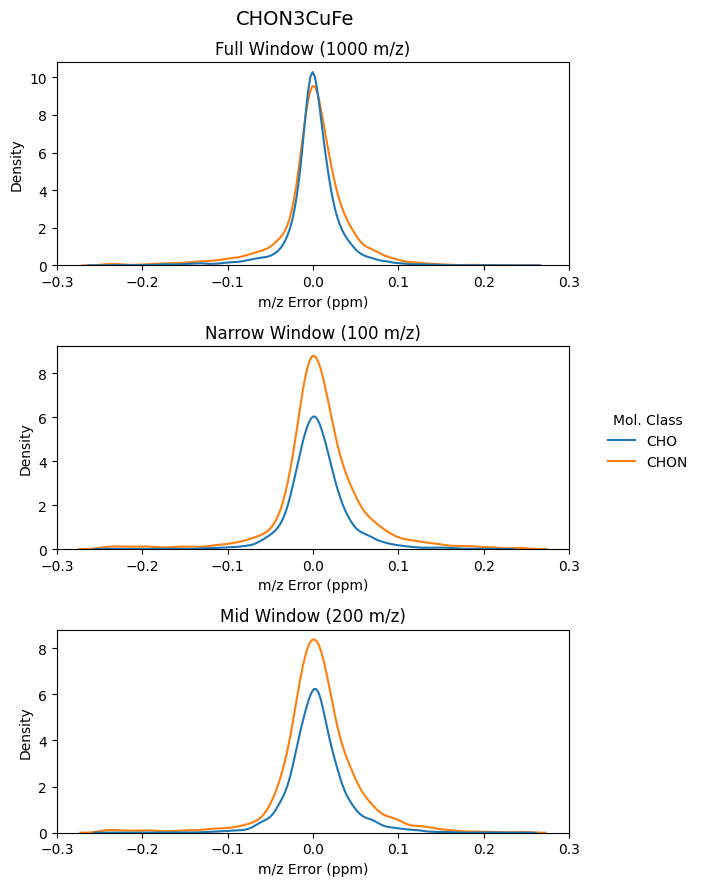

In [79]:
# plot assignment error kernel density CHON

ttt = 'CHON3CuFe'  ## title for main plot

dffull = mzfull[(mzfull['mol_class']=='CHO') | (mzfull['mol_class']=='CHON')]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (6,9))
sns.kdeplot(data=dffull[dffull['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax1)
ax1.set_xlim(-0.3,0.3)
ax1.set_title( 'Full Window (1000 m/z)')
legend = ax1.get_legend()
handles = legend.legendHandles
labels = dffull[dffull['mol_class']!='Unassigned']['mol_class'].unique()
legend.remove()

df100 = mz100[(mz100['mol_class']=='CHO') | (mz100['mol_class']=='CHON')]
sns.kdeplot(data=df100[df100['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax2, legend = False)
ax2.set_title( 'Narrow Window (100 m/z)')
ax2.set_xlim(-0.3,0.3)

df200 = mz200[(mz200['mol_class']=='CHO') | (mz200['mol_class']=='CHON')]
sns.kdeplot(data=df200[df200['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax3, legend = False)
ax3.set_title( 'Mid Window (200 m/z)')
ax3.set_xlim(-0.3,0.3)


fig.suptitle(ttt, fontsize=14)
fig.legend(handles, labels, title='Mol. Class', frameon = False, bbox_to_anchor=(1.0,0.5), loc = 'center left')

plt.tight_layout()

plt.show()


In [ ]:
# plot assignment error kernel density CHON
import itertools
ttt = 'CHON3CuFe'  ## title for main plot

# set palette 
palette = itertools.cycle(sns.color_palette())



dffull = mzfull[(mzfull['mol_class']!='CHO') & (mzfull['mol_class']!='CHON')]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (6,9))
sns.kdeplot(data=dffull[dffull['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax1, palette=palette)
ax1.set_xlim(-0.3,0.3)
ax1.set_title( 'Full Window (1000 m/z)')
legend = ax1.get_legend()
handles = legend.legendHandles
labels = dffull[dffull['mol_class']!='Unassigned']['mol_class'].unique()
legend.remove()


palette = itertools.cycle(sns.color_palette())


df100 = mz100[(mz100['mol_class']!='CHO') & (mz100['mol_class']!='CHON')]
sns.kdeplot(data=df100[df100['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax2, legend = False, palette=palette)
ax2.set_title( 'Narrow Window (100 m/z)')
ax2.set_xlim(-0.3,0.3)


palette = itertools.cycle(sns.color_palette())

df200 = mz200[(mz200['mol_class']!='CHO') & (mz200['mol_class']!='CHON')]
sns.kdeplot(data=df200[df200['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax3, legend = False, palette=palette)
ax3.set_title( 'Mid Window (200 m/z)')
ax3.set_xlim(-0.3,0.3)


fig.suptitle(ttt, fontsize=14)
fig.legend(handles, labels, title='Mol. Class', frameon = False, bbox_to_anchor=(1.0,0.5), loc = 'center left')

plt.tight_layout()

plt.show()


In [80]:
# create subsets of assigned features 
assigned_100mz = mz100[~mz100['Molecular Formula'].isnull()]
assigned_200mz = mz200[~mz200['Molecular Formula'].isnull()]
assigned_fullmz = mzfull[~mzfull['Molecular Formula'].isnull()]

print('400-600 m/z, 100 m/z windowing: \n%s features total; %s assigned (%.1f%%)' %(np.shape(mz100)[0],  np.shape(assigned_100mz)[0], np.shape(assigned_100mz)[0] / np.shape(mz100)[0] * 100))
print('\n400-600 m/z, 200 m/z windowing: \n%s features total; %s assigned (%.1f%%)' %(np.shape(mz200)[0], np.shape(assigned_200mz)[0], np.shape(assigned_200mz)[0] / np.shape(mz200)[0] * 100))
print('\n200-800 m/z window (full scan): \n%s features total; %s assigned (%.1f%%)' %(np.shape(mzfull)[0],np.shape(assigned_fullmz)[0],  np.shape(assigned_fullmz)[0] / np.shape(mzfull)[0] * 100))

400-600 m/z, 100 m/z windowing: 
30524 features total; 18390 assigned (60.2%)

400-600 m/z, 200 m/z windowing: 
26946 features total; 16085 assigned (59.7%)

200-800 m/z window (full scan): 
35742 features total; 23093 assigned (64.6%)


In [81]:
# create subsets of unique features 
print('400-600 m/z, 100 m/z windowing:')
unique_100mz = lcmsfns.getUniqueFeatures(assigned_100mz)

print('\n400-600 m/z, 200 m/z windowing:')
unique_200mz = lcmsfns.getUniqueFeatures(assigned_200mz)

print('\n200-800 m/z, 1000 m/z windowing:')
unique_fullmz = lcmsfns.getUniqueFeatures(assigned_fullmz)


400-600 m/z, 100 m/z windowing:

400-600 m/z, 200 m/z windowing:

200-800 m/z, 1000 m/z windowing:


In [82]:
# subset assigned by m/z window between 400 and 600 m/z 
assigned_100mz_456 = assigned_100mz[(assigned_100mz['m/z']>=400)]
assigned_100mz_456 = assigned_100mz_456[(assigned_100mz_456['m/z']<=600)]

assigned_200mz_456 = assigned_200mz[(assigned_200mz['m/z']>=400)]
assigned_200mz_456 = assigned_200mz_456[(assigned_200mz_456['m/z']<=600)]

assigned_fullmz_456 = assigned_fullmz[(assigned_fullmz['m/z']>=400)]
assigned_fullmz_456 = assigned_fullmz_456[(assigned_fullmz_456['m/z']<=600)]

mz100_456 = mz100[(mz100['m/z']>=400)]
mz100_456 = mz100_456[(mz100_456['m/z']<=600)]

mz200_456 = mz200[(mz200['m/z']>=400)]
mz200_456 = mz200_456[(mz200_456['m/z']<=600)]

mzfull_456 = mzfull[(mzfull['m/z']>=400)]
mzfull_456 = mzfull_456[(mzfull_456['m/z']<=600)]

print('400-600 m/z, 100 m/z windowing: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mz100_456)[0],  np.shape(assigned_100mz_456)[0], np.shape(assigned_100mz_456)[0] / np.shape(mz100_456)[0] * 100))
print('\n400-600 m/z, 200 m/z windowing: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mz200_456)[0], np.shape(assigned_200mz_456)[0], np.shape(assigned_200mz_456)[0] / np.shape(mz200_456)[0] * 100))
print('\n400-600 m/z, full window: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mzfull_456)[0],np.shape(assigned_fullmz_456)[0],  np.shape(assigned_fullmz_456)[0] / np.shape(mzfull_456)[0] * 100))



400-600 m/z, 100 m/z windowing: 
30524 features total
18390 assigned (60.2%)

400-600 m/z, 200 m/z windowing: 
26946 features total
16085 assigned (59.7%)

400-600 m/z, full window: 
18597 features total
11657 assigned (62.7%)


In [83]:
print('400-600 m/z, 100 m/z windowing:')
unique_100mz_456 = lcmsfns.getUniqueFeatures(assigned_100mz_456)

print('\n400-600 m/z, 200 m/z windowing:')
unique_200mz_456 = lcmsfns.getUniqueFeatures(assigned_200mz_456)

print('\n200-800 m/z, 1000 m/z windowing:')
unique_fullmz_456 = lcmsfns.getUniqueFeatures(assigned_fullmz_456)

400-600 m/z, 100 m/z windowing:

400-600 m/z, 200 m/z windowing:

200-800 m/z, 1000 m/z windowing:


1000 m/z
1000 m/z
1000 m/z
1000 m/z
1000 m/z
1000 m/z
1000 m/z
1000 m/z
1000 m/z
100 m/z
100 m/z
100 m/z
100 m/z
100 m/z
100 m/z
100 m/z
100 m/z
100 m/z


<AxesSubplot:xlabel='Dynamic Range', ylabel='m/z Window Size'>

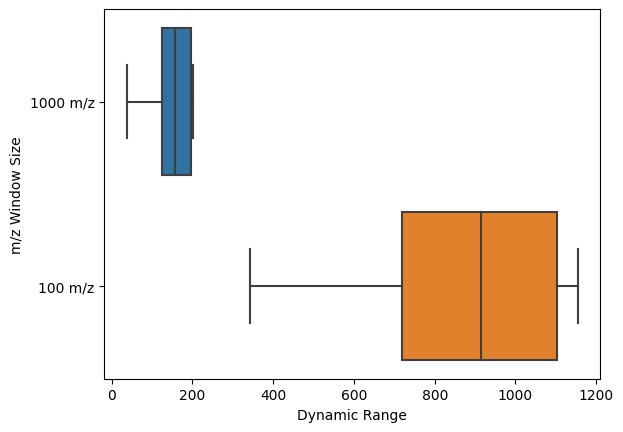

In [84]:
alldf = pd.concat([lcmsfns.blankSubtract(unique_fullmz_456, blnkthresh = 0.6), lcmsfns.blankSubtract(unique_100mz_456, blnkthresh = 0.6), lcmsfns.blankSubtract(unique_200mz_456, blnkthresh = 0.6)])
alldf = pd.concat([unique_fullmz_456, unique_100mz_456])

times = data_df['Time'].unique()

holder = {}
summary = []
summary2 = []

for mzw in alldf['m/z Window Size'].unique():
    
    sub1 = alldf[alldf['m/z Window Size'] == mzw]

    for t in times:
        
        print(mzw)
        lsh = {}
        lsh['m/z Window Size'] = mzw

        sub2 = sub1[sub1['Time'] == t]

        sub2 = sub2[sub2['S/N'] > 3]
        
        dynamic_range_t = max(sub2['Peak Height']/min(sub2['Peak Height']))
        
        lsh['Time'] = t
        lsh['Dynamic Range'] = dynamic_range_t        
        lsh['n Features'] = len(sub2)
        lsh['Max I'] = max(sub2['Peak Height'])
        lsh['Min I'] = min(sub2['Peak Height'])
        summary.append(lsh)


df=pd.DataFrame(summary)

sns.boxplot(data=df, x="Dynamic Range", y="m/z Window Size")

In [85]:
import matplotlib.gridspec as gridspec

mz100_bs = lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
mzfull_bs = lcmsfns.blankSubtract(unique_fullmz, blnkthresh = 0.6)

mzfull_bs_456 = mzfull_bs[(mzfull_bs['Calibrated m/z']>=400) & (mzfull_bs['Calibrated m/z']<=600)]
combo = pd.concat([mz100_bs, mzfull_bs_456], ignore_index=True)


for i in range(len(combo['m/z window'])):

    w = combo['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '1000 m/z'

print(combo['m/z Window Size'].unique())


mzfull_456 = mzfull[(mzfull['Calibrated m/z']>=400) & (mzfull['Calibrated m/z']<=600)]
combo2 = pd.concat([mz100, mzfull_456], ignore_index=True)

for i in range(len(combo['m/z window'])):

    w = combo2['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo2['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo2['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo2['m/z Window Size'].iloc[i] = '1000 m/z'

print(np.shape(combo),np.shape(combo2))



['100 m/z' '1000 m/z']
(29068, 50) (49121, 42)


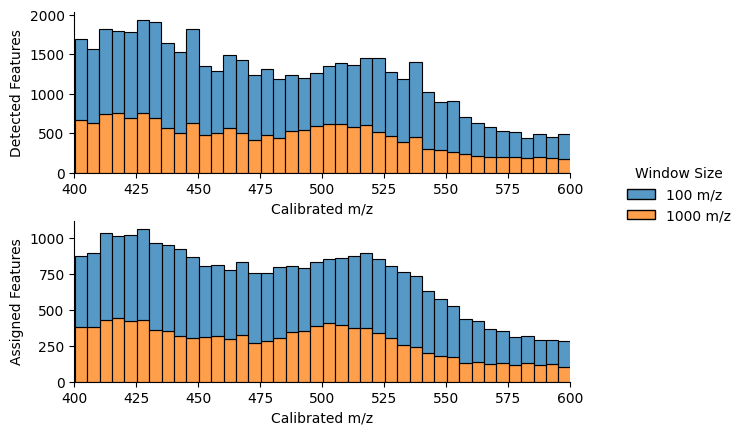

In [86]:

import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])


ax1 = plt.subplot(gs2[0])

sns.histplot(combo, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax1,binwidth=5)
ax1.set_ylabel('Assigned Features')
ax1.legend_.remove()
ax1.set_xlim(400,600)
#ax1.set_ylim(0,4500)

sns.despine(ax=ax1)


ax2 = plt.subplot(gs1[0])

sns.despine(ax=ax2)

sns.histplot(combo2, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2,binwidth=5)
ax2.set_ylabel('Detected Features')
ax2.set_xlim(400,600)
#ax2.set_ylim(0,4500)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

['CHO' 'CHON' 'CHONFe' 'CHOCu' 'CHOCuFe' 'Unassigned' 'CHONCuFe' 'CHONCu'
 'CHOFe']


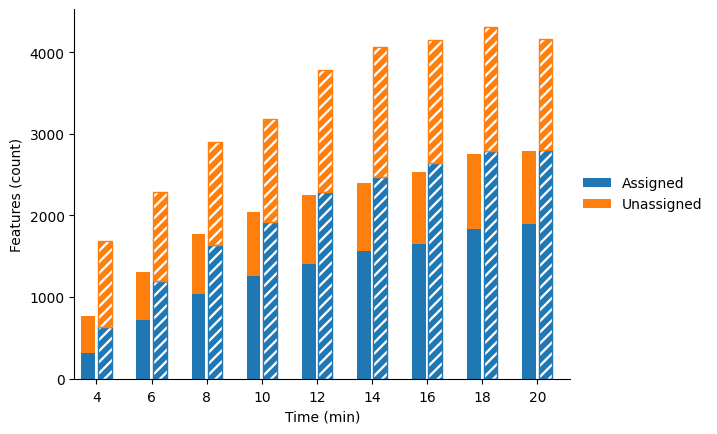

In [90]:
fig, ax4 = plt.subplots()

all_results = pd.concat([mzfull[(mzfull['m/z']>=400) & (mzfull['m/z']<=600)],mz100[(mz100['m/z']>=400) & (mz100['m/z']<=600)]], ignore_index=True)

print(all_results['mol_class'].unique())
assign_summary=[]
for time in all_results['Time'].unique():    
    for w in all_results['m/z Window Size'].unique():
        current={}
        current['Time']=time
        current['m/z Window'] = w
        for mol_class in all_results['mol_class'].unique():
            if mol_class == 'Unassigned':
                current['Unassigned']=len(all_results[(all_results['mol_class']==mol_class) & (all_results['Time']==time) & (all_results['m/z Window Size']==w)])
            else:
                current['Assigned']=len(all_results[(all_results['mol_class']!='Unassigned') & (all_results['Time']==time) & (all_results['m/z Window Size']==w)])
        assign_summary.append(current)

df=pd.DataFrame(assign_summary)

df100 = df[df['m/z Window']=='100 m/z']

ax4 = df.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
#ax4 = df100.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
plt.rcParams['hatch.linewidth'] = 4
n = 18
for i in range(n):
    new_x = ax4.patches[i].get_x() - ((i%2)/2)
    ax4.patches[i].set_x(new_x)
    ax4.patches[i+n].set_x(new_x)

    if (i%2)/2 > 0:
        ax4.patches[i].set_x(new_x+0.1)
        ax4.patches[i+n].set_x(new_x+0.1)

        ax4.patches[i].set_hatch('///')
        ax4.patches[i].set_edgecolor('C0')
        ax4.patches[i].set_fill(None)
        #ax4.patches[i].set_alpha(0.7)
        ax4.patches[i+n].set_hatch('///')
        ax4.patches[i+n].set_edgecolor('C1')
        ax4.patches[i+n].set_fill(None)

# Update tick locations correspondingly
#minor_tick_locs = [x.get_x()+1/4 for x in ax4.patches[:28]]
major_tick_locs = np.array([x.get_x()+1/4 for x in ax4.patches[:18]]).reshape(9, 2).mean(axis=1)
#ax4.set_xticks(minor_tick_locs, minor=True)
ax4.set_xticks(major_tick_locs)

# Use indices from dataframe as tick labels
major_tick_labels = df['Time'].unique()
#major_tick_labels = df_g.index.levels[0].values
#ax4.xaxis.set_ticklabels(minor_tick_labels, minor=True)
ax4.xaxis.set_ticklabels(major_tick_labels)

# Remove ticks and organize tick labels to avoid overlap
#ax4.tick_params(axis='x', which='both', bottom='off')
#ax4.tick_params(axis='x', which='minor', rotation=45)
ax4.tick_params(axis='x', which='major', pad=5, rotation=0)

ax4.set_xlabel('Time (min)')
ax4.set_ylabel('Features (count)')

ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
sns.despine(ax=ax4)


plt.show()


['CHO' 'CHON' 'CHONFe' 'CHOCu' 'CHOCuFe' 'Unassigned' 'CHONCuFe' 'CHONCu'
 'CHOFe']


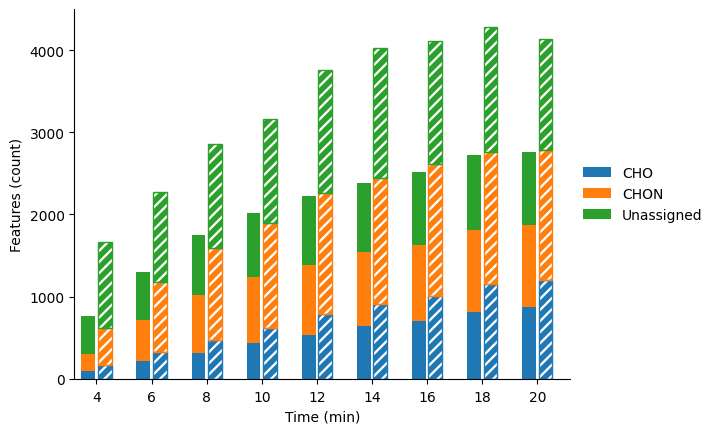

In [88]:
fig, ax4 = plt.subplots()

all_results = pd.concat([mzfull[(mzfull['m/z']>=400) & (mzfull['m/z']<=600)],mz100[(mz100['m/z']>=400) & (mz100['m/z']<=600)]], ignore_index=True)

print(all_results['mol_class'].unique())
assign_summary=[]
for time in all_results['Time'].unique():    
    for w in all_results['m/z Window Size'].unique():
        current={}
        current['Time']=time
        current['m/z Window'] = w
        for mol_class in ['CHO','CHON', 'Unassigned']:
            current[mol_class]=len(all_results[(all_results['mol_class']==mol_class) & (all_results['Time']==time) & (all_results['m/z Window Size']==w)])
        assign_summary.append(current)
df=pd.DataFrame(assign_summary)

df100 = df[df['m/z Window']=='100 m/z']

ax4 = df.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
#ax4 = df100.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
plt.rcParams['hatch.linewidth'] = 4
n = 18
for i in range(n):
    new_x = ax4.patches[i].get_x() - ((i%2)/2)
    ax4.patches[i].set_x(new_x)
    ax4.patches[i+n].set_x(new_x)
    ax4.patches[i+(2*n)].set_x(new_x)

    if (i%2)/2 > 0:
        ax4.patches[i].set_x(new_x+0.1)
        ax4.patches[i+n].set_x(new_x+0.1)
        ax4.patches[i+(2*n)].set_x(new_x+0.1)

        ax4.patches[i].set_hatch('///')
        ax4.patches[i].set_edgecolor('C0')
        ax4.patches[i].set_fill(None)
        #ax4.patches[i].set_alpha(0.7)
        ax4.patches[i+n].set_hatch('///')
        ax4.patches[i+n].set_edgecolor('C1')
        ax4.patches[i+n].set_fill(None)
        #ax4.patches[i+(2*n)].set_alpha(0.7)
        ax4.patches[i+(2*n)].set_hatch('///')
        ax4.patches[i+(2*n)].set_edgecolor('C2')
        ax4.patches[i+(2*n)].set_fill(None)



# Update tick locations correspondingly
#minor_tick_locs = [x.get_x()+1/4 for x in ax4.patches[:28]]
major_tick_locs = np.array([x.get_x()+1/4 for x in ax4.patches[:18]]).reshape(9, 2).mean(axis=1)
#ax4.set_xticks(minor_tick_locs, minor=True)
ax4.set_xticks(major_tick_locs)

# Use indices from dataframe as tick labels
major_tick_labels = df['Time'].unique()
#major_tick_labels = df_g.index.levels[0].values
#ax4.xaxis.set_ticklabels(minor_tick_labels, minor=True)
ax4.xaxis.set_ticklabels(major_tick_labels)

# Remove ticks and organize tick labels to avoid overlap
#ax4.tick_params(axis='x', which='both', bottom='off')
#ax4.tick_params(axis='x', which='minor', rotation=45)
ax4.tick_params(axis='x', which='major', pad=5, rotation=0)

ax4.set_xlabel('Time (min)')
ax4.set_ylabel('Features (count)')

ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
sns.despine(ax=ax4)

plt.show()


['CHO' 'CHON' 'CHONFe' 'CHOCu' 'CHOCuFe' 'Unassigned' 'CHONCuFe' 'CHONCu'
 'CHOFe']


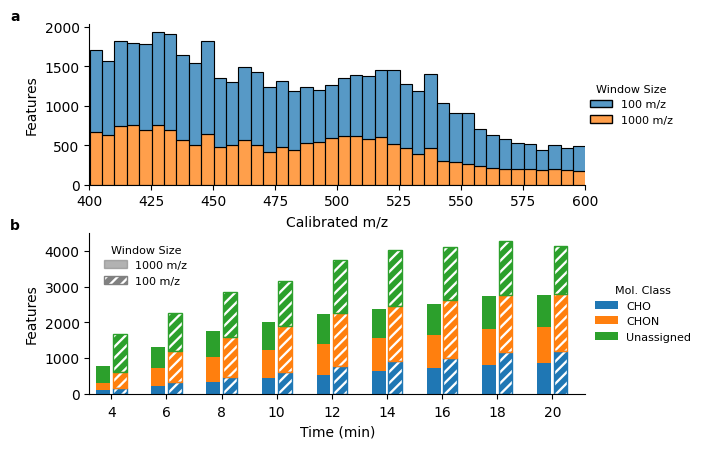

In [133]:

import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])

plt.rcParams['legend.title_fontsize'] = 8


ax2 = plt.subplot(gs1[0])

sns.despine(ax=ax2)

sns.histplot(combo2, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2,binwidth=5)
ax2.set_ylabel('Features')
ax2.set_xlim(400,600)
#ax2.set_ylim(0,4500)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
#ax2.legend_.remove()

fig = plt.gcf()

ax2.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size', prop={'size': 8})
ax2.text(-0.15, 1.05,'a',
    horizontalalignment='center',
    verticalalignment='center',
    transform = ax2.transAxes, fontweight='bold', fontsize = 10)

ax4 = plt.subplot(gs2[0])


all_results = pd.concat([mzfull[(mzfull['m/z']>=400) & (mzfull['m/z']<=600)],mz100[(mz100['m/z']>=400) & (mz100['m/z']<=600)]], ignore_index=True)

print(all_results['mol_class'].unique())
assign_summary=[]
for time in all_results['Time'].unique():    
    for w in all_results['m/z Window Size'].unique():
        current={}
        current['Time']=time
        current['m/z Window'] = w
        for mol_class in ['CHO','CHON', 'Unassigned']:
            current[mol_class]=len(all_results[(all_results['mol_class']==mol_class) & (all_results['Time']==time) & (all_results['m/z Window Size']==w)])
        assign_summary.append(current)
df=pd.DataFrame(assign_summary)

df100 = df[df['m/z Window']=='100 m/z']
ax4 = df.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
#ax4 = df100.plot.bar(x='Time',y=df.columns[1:],stacked=True,ylabel='Peaks',ax=ax4)
plt.rcParams['hatch.linewidth'] = 4
n = 18
for i in range(n):
    new_x = ax4.patches[i].get_x() - ((i%2)/2)
    ax4.patches[i].set_x(new_x)
    ax4.patches[i+n].set_x(new_x)
    ax4.patches[i+(2*n)].set_x(new_x)

    if (i%2)/2 > 0:
        ax4.patches[i].set_x(new_x+0.1)
        ax4.patches[i+n].set_x(new_x+0.1)
        ax4.patches[i+(2*n)].set_x(new_x+0.1)

        ax4.patches[i].set_hatch('///')
        ax4.patches[i].set_edgecolor('C0')
        ax4.patches[i].set_fill(None)
        #ax4.patches[i].set_alpha(0.7)
        ax4.patches[i+n].set_hatch('///')
        ax4.patches[i+n].set_edgecolor('C1')
        ax4.patches[i+n].set_fill(None)
        #ax4.patches[i+(2*n)].set_alpha(0.7)
        ax4.patches[i+(2*n)].set_hatch('///')
        ax4.patches[i+(2*n)].set_edgecolor('C2')
        ax4.patches[i+(2*n)].set_fill(None)



# Update tick locations correspondingly
#minor_tick_locs = [x.get_x()+1/4 for x in ax4.patches[:28]]
major_tick_locs = np.array([x.get_x()+1/4 for x in ax4.patches[:18]]).reshape(9, 2).mean(axis=1)
#ax4.set_xticks(minor_tick_locs, minor=True)
ax4.set_xticks(major_tick_locs)

# Use indices from dataframe as tick labels
major_tick_labels = df['Time'].unique()
#major_tick_labels = df_g.index.levels[0].values
#ax4.xaxis.set_ticklabels(minor_tick_labels, minor=True)
ax4.xaxis.set_ticklabels(major_tick_labels)

# Remove ticks and organize tick labels to avoid overlap
#ax4.tick_params(axis='x', which='both', bottom='off')
#ax4.tick_params(axis='x', which='minor', rotation=45)
ax4.tick_params(axis='x', which='major', pad=5, rotation=0)

ax4.set_xlabel('Time (min)')
ax4.set_ylabel('Features')

ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, title='Mol. Class')

leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, title='Mol. Class', prop={'size': 8})
ax4.add_artist(leg)

a_val = 0.6

patch_full = mpatches.Patch(color='gray', alpha=a_val,label='1000 m/z')
patch_100 = mpatches.Patch(edgecolor='gray', facecolor = 'white', hatch = '///',label='100 m/z')



colors = ['#EA5739','#FEFFBE','#4BB05C']


#circ1 = mpatches.Patch( facecolor=colors[0],alpha=a_val,hatch=r'\\\\',label='Label1')
#circ2= mpatches.Patch( facecolor=colors[1],alpha=a_val,hatch='o',label='Label2')
#circ3 = mpatches.Patch(facecolor=colors[2],alpha=a_val,hatch='+',label='Label3')


plt.legend(handles=[patch_full, patch_100], loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon = False, title='Window Size', prop={'size': 8}) #.legend(handles = [circ1,circ2,circ3],loc=2)#.
sns.despine(ax=ax4)
ax4.text(-.15, 1.05,'b',
    horizontalalignment='center',
    verticalalignment='center',
    transform = ax4.transAxes, fontweight='bold', fontsize = 10)
fig = plt.gcf()


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


here


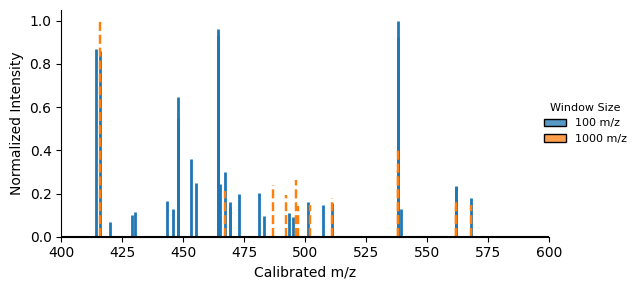

In [163]:
importlib.reload(icrms)
importlib.reload(lcmsfns)
import matplotlib.gridspec as gridspec



fig, ax2 = plt.subplots(figsize = (6.5,3))

mz100_bs = lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
mzfull_bs = lcmsfns.blankSubtract(unique_fullmz, blnkthresh = 0.6)

mzfull_bs_456 = mzfull_bs[(mzfull_bs['Calibrated m/z']>=400) & (mzfull_bs['Calibrated m/z']<=600)]

d1=lcmsfns.normMS(mz100_bs[mz100_bs['Cu']>0],mz100_bs[mz100_bs['Cu']>0])
d2=lcmsfns.normMS(mzfull_bs_456[mzfull_bs_456['Cu']>0],mzfull_bs_456[mzfull_bs_456['Cu']>0])

#d1=mz100_bs[mz100_bs['Cu']>0]
#d2=mzfull_bs_456[mzfull_bs_456['Cu']>0]


ax2 = lcmsfns.plot_ms(df1=d1,  df2=d2, start_mz=400, end_mz=600,ax_ms=ax2, norm=True)

sns.despine(ax=ax2)

ax2.set_xlim(400,600)
ax2.set_ylim(bottom=0)

print('here')

ax2.legend(handles, labels, bbox_to_anchor=(0.98, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size', prop={'size': 8})

plt.tight_layout()
plt.show()

(18159, 47)
(17669, 48)
[0 1 2 3]


ValueError: The palette list has the wrong number of colors.

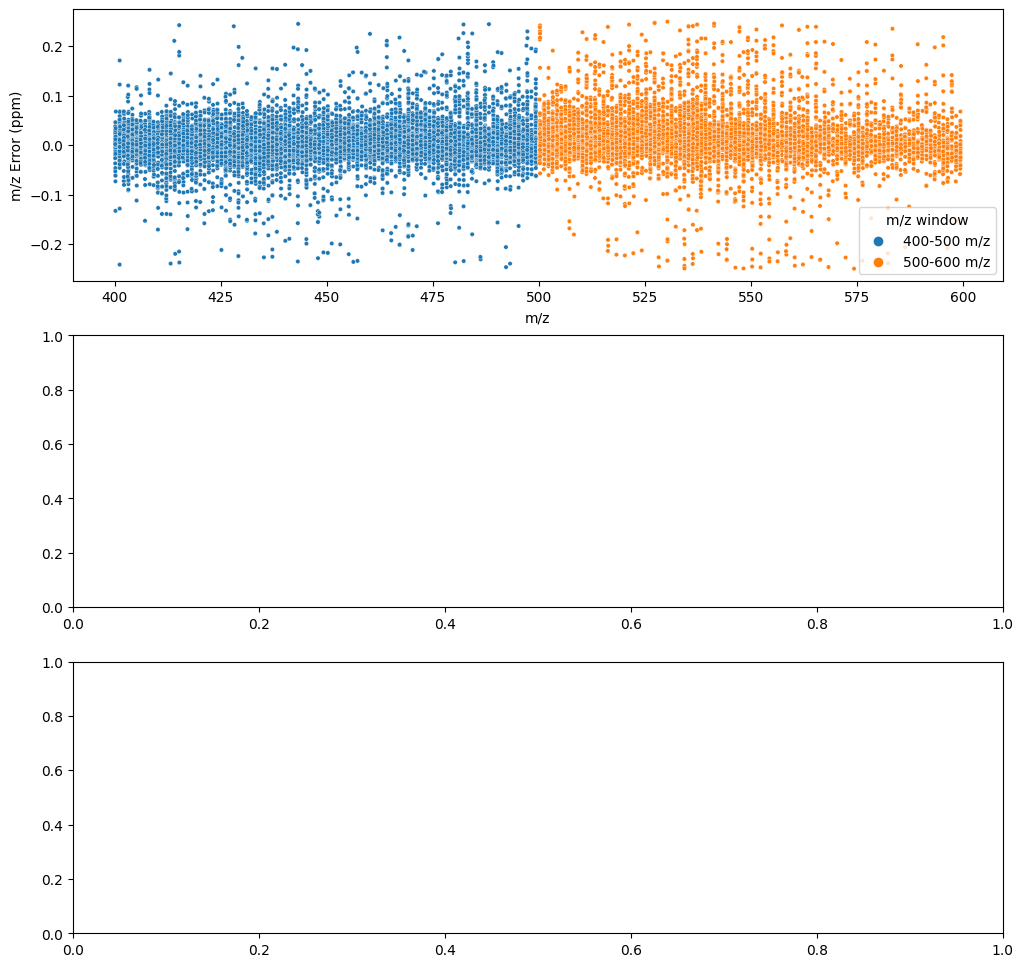

In [89]:
# 100 m/z window, error plots with blank substraction

importlib.reload(icrms)
importlib.reload(lcmsfns)
df = lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
print(np.shape(unique_100mz))
print(np.shape(df))
fig = lcmsfns.plotUnique(df,ps=10)

fig.suptitle('100 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()



In [ ]:
# 100 m/z window, error plots with blank substraction

cu_features = data_df[(data_df['Cu']>0)]

print(cu_features)

#410.151212

#data.master_data_holder['20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_rep2.raw'] #[file]={'parser': parser}

EICdic = {}
for mz,mf in zip(cu_features['m/z'],cu_features['Molecular Formula']):
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    EICdic[mf]=EIC[0][mz]

In [ ]:
#ax.set_ylim(0,maxicp*1.1)

for mf in EICdic:   

    fig, ax = plt.subplots()
    
    eict=EICdic[mf].time
    eics=EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    ax.set_xlim(4,22)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()

    plt.show()

In [ ]:
# 200 m/z window, error plots with blanks removed 

df = lcmsfns.blankSubtract(unique_200mz, blnkthresh = 0.6)
print(np.shape(unique_200mz))
print(np.shape(df))

fig = lcmsfns.plotUnique(df,ps=10)
fig.suptitle('200 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()


In [ ]:
# full m/z window, error plots with blanks removed 

mask = ~unique_fullmz_456['file'].str.contains('qh2o', case=False, na=False)
unique_fullmz_nb=unique_fullmz_456[mask]
df = lcmsfns.blankSubtract(unique_fullmz_456, blnkthresh = 0.6)
print(np.shape(unique_fullmz_456))
print(np.shape(df))

fig = lcmsfns.plotUnique(df,ps=10)
fig.suptitle('1000 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()

In [ ]:
##### here 

temp = df_bs[abs(df_bs['m/z Error (ppm)'])<0.15]
print(np.shape(temp))
fig = lcmsfns.plotUnique(pd.concat([temp[temp['m/z window']== '400-500 m/z'], temp[temp['m/z window']=='500-600 m/z'], temp[temp['m/z window']=='400-600 m/z'], temp[temp['m/z window']=='200-1200 m/z']]),ps=5)

plt.tight_layout()
plt.show()
plt.close('all')

In [ ]:
mz100_bs = df_bs[(df_bs['m/z window'] == '400-500 m/z') | (df_bs['m/z window'] == '500-600 m/z')]

mz200_bs = df_bs[(df_bs['m/z window'] == '400-600 m/z')]

mzfull_bs = df_bs[(df_bs['m/z window'] == '200-1200 m/z')]
mzfull_bs = mzfull_bs[(mzfull_bs['m/z']>=400) & (mzfull_bs['m/z']<= 600)]

df = mz100_bs
df2 = mz200_bs
df3 = mzfull_bs
fig, ax = plt.subplots()
ax.scatter(x=df['N/C'],y=df['O/C'],c='C3',s=50,label='400-500 m/z\n500-600 m/z')#,s=df['S/N']
#sns.scatterplot(x='N/C',y='O/C', hue='m/z', data=df, ax=ax,s=50)
ax.scatter(x=df2['N/C'],y=df2['O/C'],c='C0',s=5,label='400-600 m/z') #s=df2['S/N'],
#ax.scatter(x=df3['N/C'],y=df3['O/C'],c='C5',label='200-1200 m/z') #s=df3['S/N']
ax.set(xlabel='O/C',ylabel='N/C')
#ax.set_xlim(0,1.2)
#ax.set_ylim(0,0.5)
ax.legend(frameon=False, bbox_to_anchor=(1.0,0.5), loc='center left')
plt.title(r'Narrow window ($\Delta$m/z 100) and mid window ($\Delta$m/z 200)')
plt.show()


In [ ]:
mz100_bs = df_bs[(df_bs['m/z window'] == '400-500 m/z') | (df_bs['m/z window'] == '500-600 m/z')]

mz200_bs = df_bs[(df_bs['m/z window'] == '400-600 m/z')]

mzfull_bs = df_bs[(df_bs['m/z window'] == '200-1200 m/z')]
mzfull_bs = mzfull_bs[(mzfull_bs['m/z']>=400) & (mzfull_bs['m/z']<= 600)]

df = mz100_bs
df2 = mz200_bs
df3 = mzfull_bs
fig, ax = plt.subplots()
ax.scatter(x=df['N/C'],y=df['O/C'],c='C3',label='400-500 m/z\n500-600 m/z')#,s=df['S/N']
#ax.scatter(x=df2['N/C'],y=df2['O/C'],c='black',s=5,label='400-600 m/z') #s=df2['S/N'],
ax.scatter(x=df3['N/C'],y=df3['O/C'],c='black',s=5,label='200-1200 m/z') #s=df3['S/N']
ax.set(xlabel='O/C',ylabel='N/C')
#ax.set_xlim(0,1.2)
#ax.set_ylim(0,0.5)
ax.legend(frameon=False, bbox_to_anchor=(1.0,0.5), loc='center left')
plt.title(r'Narrow window ($\Delta$m/z 100) and full window')
plt.show()


In [ ]:
mz100_contains_cu = mz100_bs[(mz100_bs['Cu'] == 1) ]
print(np.shape(mz100_contains_cu))


mz200_contains_cu = mz200_bs[(mz200_bs['Cu'] == 1) ]
print(np.shape(mz200_contains_cu))


mzfull_contains_cu = mzfull_bs[(mzfull_bs['Cu'] == 1)]
print(np.shape(mzfull_contains_cu))



In [ ]:
temp = temp[temp['Cu'] == 1]

temp['overlap'] = temp.Index

for i in range(len(temp['Molecular Formula'])):

    mf = temp['Molecular Formula'].iloc[i]

    if (mf not in mzfull_contains_cu['Molecular Formula'].values) and (mf not in mz200_contains_cu['Molecular Formula'].values):
        temp['overlap'].iloc[i] = 'n'

    elif (mf in mzfull_contains_cu['Molecular Formula'].values) and (mf not in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nw'

    elif (mf not in mzfull_contains_cu['Molecular Formula'].values) and (mf in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nm'

    elif (mf in mzfull_contains_cu['Molecular Formula'].values) and (mf in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nmw'



In [ ]:
sns.jointplot(data=temp, x='N/C',y='O/C', hue='overlap')

In [ ]:
print(np.shape(mzfull_contains_cu))
print(np.shape(mz100_contains_cu))

combo_cu = pd.concat([mz100_contains_cu, mzfull_contains_cu])


In [ ]:

combo_cu['m/z Window Size'] = combo_cu.Index

for i in range(len(combo_cu['m/z window'])):

    w = combo_cu['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '1000 m/z'

combo_cu['m/z Window Size'].unique()

In [ ]:
mz100_cu_limited_err.columns

In [ ]:
import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.02)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0], hspace = .05)

d1=lcmsfns.normMS(mz100_cu_limited_err,mz100_cu_limited_err)
d2=lcmsfns.normMS(mzfull_cu_limited_err,mzfull_cu_limited_err)

ax1_b = plt.subplot(gs1[0])
ax1_b = lcmsfns.plot_ms(df1=d1,  df2=d2, start_mz=400, end_mz=600,ax_ms=ax1_b, norm=True)

sns.despine(ax=ax1_b)

ax1_b.set_ylim(bottom=0)





ax2 = plt.subplot(gs2[0])

sns.despine(ax=ax2)

sns.histplot(combo_cu, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2)
ax2.set_ylabel('Assigned Features (count)')
ax2.set_xlim(400,600)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

In [ ]:
combo = pd.concat([mz100_bs, mzfull_bs])

combo['m/z Window Size'] = combo.Index

for i in range(len(combo['m/z window'])):

    w = combo['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '1000 m/z'

combo['m/z Window Size'].unique()

combo_n = combo[combo['N']>=1]

import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])

ax1 = plt.subplot(gs1[0])

sns.histplot(combo, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax1)
ax1.set_ylabel('Assigned Features\n(count)')
ax1.legend_.remove()
ax1.set_xlim(400,600)
sns.despine(ax=ax1)





ax2 = plt.subplot(gs2[0])

sns.despine(ax=ax2)

sns.histplot(combo_cu, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2)
ax2.set_ylabel('Assigned Cu Features\n(count)')
ax2.set_xlim(400,600)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

In [ ]:

print((np.shape(combo[combo['m/z Window Size']=='100 m/z'])[0] - np.shape(combo[combo['m/z Window Size']=='1000 m/z'])[0]) /  np.shape(combo[combo['m/z Window Size']=='1000 m/z'])[0])

print((np.shape(combo_cu[combo_cu['m/z Window Size']=='100 m/z'])[0] - np.shape(combo_cu[combo_cu['m/z Window Size']=='1000 m/z'])[0]) / np.shape(combo_cu[combo_cu['m/z Window Size']=='1000 m/z'])[0])

In [ ]:
#data.master_data_holder['20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_rep2.raw'] #[file]={'parser': parser}
mz100_cu_limited_err = mz100_contains_cu[abs(mz100_contains_cu['m/z Error (ppm)']) < 0.25]
mz100_EICdic = {}
for mz,file,mf in zip(mz100_cu_limited_err['m/z'],mz100_cu_limited_err['file'],mz100_cu_limited_err['Molecular Formula']):
    
    parser = data.master_data_holder[file]['parser']    
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    mz100_EICdic[mf]=EIC[0][mz]
    #mz100_EICdic[mz]={'eic':EIC[0][mz],'formula':mf}


In [ ]:
mzfull_cu_limited_err = mzfull_contains_cu[abs(mzfull_contains_cu['m/z Error (ppm)']) < 0.25]
fullmz_EICdic = {}
for mz,file,mf in zip(mzfull_cu_limited_err['m/z'],mzfull_cu_limited_err['file'],mzfull_cu_limited_err['Molecular Formula']):
    
    parser = data.master_data_holder[file]['parser']
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    fullmz_EICdic[mf]=EIC[0][mz]

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

icpms_file = '/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/Keck iCAP Q/2022/2022-09/Tillamook, Sept 2022/spring_ENV.csv'
icpms = pd.read_csv(icpms_file, sep=';',header=1)


metals = ['63Cu', '115In']

pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec13.pdf')

fig, ax = plt.subplots()

maxicp = 0 
for me in metals:
    me_key = 'Time %s' %me
    ax.plot(icpms[me_key]/60, icpms[me], label=me)        
    



#ax.set_ylim(0,maxicp*1.1)
ax.set_title('Cu ICPMS Trace')
ax.set_xlabel('Time (min)')
ax.set_ylabel('ICPMS signal (cps)')
ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
ax.set_xlim(2,30)
fig.tight_layout()
pdf.savefig()

for mf in mz100_EICdic:   

    fig, ax = plt.subplots()
    
    eict=mz100_EICdic[mf].time
    eics=mz100_EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    if mf in fullmz_EICdic:
        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C0', label = 'full window')
    ax.set_xlim(4,28)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()
    pdf.savefig()

for mf in fullmz_EICdic:   

    if mf not in mz100_EICdic:

        fig, ax = plt.subplots()

        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        inds = np.where(np.asarray(eic2t)<28)

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C5', label = 'full window')

        ax.set_xlim(4,28)
        ax.set_title(mf)
        ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
        fig.tight_layout()
        pdf.savefig()

pdf.close()

In [ ]:
# C23 H32 O3 Cu

sub = combo[combo['Molecular Formula'] == 'C23 H32 O3 Cu1']

sub

In [ ]:
for i in range(len(mz100_cu_limited_err.index)):

    mf = mz100_cu_limited_err['Molecular Formula'].iloc[i]
    
    if mf in mzfull_cu_limited_err['Molecular Formula'].values:

        print('\n\nNarrow m/z:')
        print(mz100_cu_limited_err.iloc[i,:])

        ind = mzfull_cu_limited_err[mzfull_cu_limited_err['Molecular Formula'] == mf].index 
        print('\nFull m/z:')
        print(mzfull_cu_limited_err.loc[ind].squeeze())




In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec5.pdf')


for mf in mz100_EICdic:   

    fig, ax = plt.subplots()
    
    eict=mz100_EICdic[mf].time
    eics=mz100_EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    if mf in fullmz_EICdic:
        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C0', label = 'full window')
    ax.set_xlim(4,28)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()
    pdf.savefig()

for mf in fullmz_EICdic:   

    if mf not in mz100_EICdic:

        fig, ax = plt.subplots()

        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        inds = np.where(np.asarray(eic2t)<28)

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C5', label = 'full window')

        ax.set_xlim(4,28)
        ax.set_title(mf)
        ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
        fig.tight_layout()
        pdf.savefig()

pdf.close()

In [ ]:
refs = pd.read_csv('/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref')
#r45 = refs[(refs['m/z value']>=400) & (refs['m/z value']<=500)]

print(refs[' m/z value'])


In [ ]:
import math
#assigned_100mz
#assigned_200mz
#assigned_fullmz[assigned_fullmz['13C'] == 1]
test1 = []
test2 = []
for i in range(len(unique_fullmz[unique_fullmz['13C'] == 1].index)):
    
    r13c = unique_fullmz[unique_fullmz['13C'] == 1].iloc[i]
    mf13c = r13c['Molecular Formula']
    iso_sim = r13c['Isotopologue Similarity']
    
    mono_index = int(r13c['Mono Isotopic Index'])

    r13c.fillna(0,inplace=True)
    nC = int(r13c['C'])
    n13C = int(r13c['13C'])
    nH = int(r13c['H'])
    nO = int(r13c['O'])
    nN = int(r13c['N'])

    if (nO > 0) and (~math.isnan(nO)):
        mf_t = 'C%s H%s O%s' %((nC + n13C),nH,nO)
    elif (nN > 0) and (~math.isnan(nN)):
        mf_t = 'C%s H%s O%s N%s' %((nC + n13C),nH,nO, nN)
    else:
        mf_t = 'C%s H%s' %((nC + n13C),nH)

   # print('\n',mf_t)
    if mf_t in unique_fullmz['Molecular Formula']:
        print('yyy')
        print(unique_fullmz[unique_fullmz['Molecular Formula'] == mf_t])
    #mf12c = unique_fullmz[unique_fullmz['Isotopologue Similarity']==iso_sim]['Molecular Formula']

    #temp2 = mf12c.values
    #print('\ntemp2')
    #print(temp2)
    #for i in range(len(temp2)):
    #    test2.append(temp2[i])

    mf12c_in = unique_fullmz[unique_fullmz['Index']==mono_index]
    best_match = mf12c_in[mf12c_in['Isotopologue Similarity']==iso_sim]['Molecular Formula']

    temp=best_match.values
    print('temp')
    print(mf13c,mono_index,temp)
    for i in range(len(temp)):
        test1.append(temp[i])


#print('\n', mf13c,'\n',best_match)

print(len(test1))

In [ ]:
mono_indices = []
iso_indices = []
for i in unique_fullmz[unique_fullmz['13C'] == 1].index:

    r13c = unique_fullmz.loc[i]

    mf13c = r13c['Molecular Formula']
    iso_sim = r13c['Isotopologue Similarity']    
    mono_index = int(r13c['Mono Isotopic Index'])

    mf12c_in = unique_fullmz[unique_fullmz['Index']==mono_index]
    best_match = mf12c_in[mf12c_in['Isotopologue Similarity']==iso_sim].index

    if len(best_match.values) > 0:
        
        mono_indices.append(best_match.values[0])

        iso_indices.append(i)

print(len(mono_indices),len(iso_indices))

In [ ]:
df = assigned_fullmz[assigned_fullmz['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']
df = assigned_100mz_456[assigned_fullmz['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']

intensity_v_ratio = []

for t in df['Time'].unique():

    print(t)

    time_sub = df[df['Time'] == t]

    time_sub['13C'].fillna(0)
   # print(time_sub['Index'])
    if 1.0 in time_sub['13C'].values:

        for i in time_sub[time_sub['13C'] == 1].index:

            iso_row = time_sub.loc[i]

            #print(iso_row)

            mf_13C = iso_row['Molecular Formula']
            mono_index = int(iso_row['Mono Isotopic Index'])
            mf_12C = time_sub[time_sub['Index']==mono_index]['Molecular Formula']
            nC =  time_sub[time_sub['Index']==mono_index]['C'].iloc[0]
            #print(mf_13C, mono_index, mf_12C)

            int_13C = iso_row['Peak Height']
            mz_13C = iso_row['Calibrated m/z']
            int_12C =  time_sub[time_sub['Index']==mono_index]['Peak Height'].iloc[0]
            mz_12C =  time_sub[time_sub['Index']==mono_index]['Calibrated m/z'].iloc[0]
            print(int_12C, int_13C, nC, mz_12C, mz_13C)
            intensity_v_ratio.append([int_12C, int_13C, nC, mz_12C, mz_13C])







In [ ]:
df = np.asarray(intensity_v_ratio)
np.shape(df)
df1 = df #[df[:,0]<1e5]

pddf = pd.DataFrame(df1,columns=['12C Intensity','13C Intensity','nC', 'm/z 12C', 'm/z 13C'])


In [ ]:
import scipy

df1 = df[df[:,0]<1e5]
logx = np.log10(df1[:,0])
logy = np.log10(df1[:,2])

logyerr = np.std(df1[:,1]) / df1[:,2]

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = scipy.optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

In [ ]:
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

nn = 1e4
df1 = df[df[:,0]<nn]

xData = df1[:,0]
yData = df1[:,1]

xmin = min(xData)
print(xmin)
def func(x, a,  b, c, d): # Sigmoid A With Offset from zunzun.com
    #return a*(x-d)**3 + b*(x-d)**2 + c*x 
    return a*np.exp(b/((x-800)))
    return a*(x-d)**5 + b*(x-d)**2 + c*(x-d)

def func2(x, a,  b, c, d): # Sigmoid A With Offset from zunzun.com
    #return a*(x-d)**3 + b*(x-d)**2 + c*x 
    return a*np.exp((b-x)/((x)))
    return a*(x-d)**5 + b*(x-d)**2 + c*(x-d)

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)



# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData)
fittedParameters2, pcov2 = curve_fit(func2, xData, yData)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(df[:,0], df[:,1],  'D')

    # create data for the fitted equation plot
    xModel = np.linspace(1000, nn, int(1e6))
    yModel = func(xModel, *fittedParameters)

    xModel2 = np.linspace(1000, nn, int(1e6))
    yModel2 = func2(xModel2, *fittedParameters2)
    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.plot(xModel2, yModel2, color ='red')

    axes.set_xlim(0,1.1*nn)
    axes.set_ylim(0,1)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [ ]:


fig, ax = plt.subplots()

ax.scatter(pddf['12C Intensity'], pddf['12C Intensity']/pddf['13C Intensity']/pddf['nC'])

#ax.errorbar(df1[:,0], df1[:,1], yerr=np.std(df1[:,1]), fmt='k.')  # Data

ax.set_ylim(0,1)

ax.set_xlim(0,1.1e4)
plt.show()

In [ ]:


xx = np.linspace(1, int(5e5), int(1e4))
yy = np.linspace(1, int(5e5), int(1e4))


fig, ax = plt.subplots()

#ax.scatter((pddf['nC']*1.1/100*pddf['12C Intensity']),(pddf['13C Intensity']-(pddf['nC']*1.1/100*pddf['12C Intensity']))/(pddf['nC']*1.1/100*pddf['12C Intensity']))
ax.scatter((pddf['nC']*1.1/100*pddf['12C Intensity']),pddf['13C Intensity'])
#ax.scatter((pddf['nC']*pddf['12C Intensity']),pddf['13C Intensity'])

ax.scatter(xx, yy, color='orange',s=1)

ax.set_xlim(0,10e4)
ax.set_ylim(0,10e4)
ax.plot

plt.show()

In [ ]:
def func2(x, a,  b, c): # Sigmoid A With Offset from zunzun.com
    return 1 - b/((x)**0.5)


yy = (pddf['nC']*1.07/100*pddf['12C Intensity'])
xx = pddf['12C Intensity']

fittedParameters2, pcov2 = curve_fit(func2, xx,  pddf['13C Intensity']/yy)

print(fittedParameters2)
fig, ax = plt.subplots()

ax.scatter(pddf['12C Intensity'], pddf['13C Intensity']/yy,s=1)


xModel2 = np.linspace(1000, 1e6, int(1e6))
yModel2 = func2(xModel2, *fittedParameters2)
# now the model as a line plot 
ax.plot(xModel2, yModel2)

ax.plot(xModel2, yModel2, color ='red')

ax.set_xlim(0,0.5e6)
ax.set_ylim(0,1.05)

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

ax.set_xlabel(r'Intensity $^{12}$C$_{M}$' + ' (1000s cps)') #'Monoisotopic intensity (1000s cps)')
ax.set_ylabel(r'Intensity $^{13}$C$_{M}$ / Intensity $^{13}$C$_{T}$')
#ax.set_ylabel(r'$\frac{{{%s}}}{%s}$' %(nom,den))

plt.show()

In [ ]:
df_cu = mz100_contains_cu
df_cu['13C'] = df_cu['13C'].fillna(0)
df_cu_mono = df_cu[df_cu['13C']==0]

print(np.shape(df_cu))
print(np.shape(df_cu_mono))

df_cu_mono['Theoretical 65Cu Peak Height'] = df_cu_mono['Peak Height']*.3083

#69.17 and 30.83% 63Cu 65Cu

for i, j in zip(df_cu_mono['Peak Height'], df_cu_mono['Theoretical 65Cu Peak Height']):
    iso_ph = df_cu_mono['C'].iloc[0]*1.1/100*i
    print(i,j, iso_ph)

